### Instruction
0. Install siman - sudo pip3 install siman
1. Prepare file with crystall structure in one of the following formats: cif, VASP, abinit
2. Prepare file with input parameters (INCAR) or use pre-defined sets: 'static'
3. Prepare POTCAR - potentials files
4. For correct work of pip you may need to install visual studio from http://landinghub.visualstudio.com/visual-cpp-build-tools

### Import libraries

In [1]:
from siman import header
from siman.header import db
from siman.SSHTools import SSHTools
from siman.calc_manage import add, res
from siman.database import write_database, read_database
from siman.set_functions import read_vasp_sets
from siman.calc_manage import smart_structure_read
%matplotlib inline
read_database() # read saved database if available

({},
 {'aks': <siman.set_functions.InputSet at 0x7f826aec6970>,
  'static': <siman.set_functions.InputSet at 0x7f826aee1070>,
  'opt': <siman.set_functions.InputSet at 0x7f826aee1460>,
  'gaus_sp': <siman.set_functions.InputSet at 0x7f826aee3040>,
  '1m': <siman.set_functions.InputSet at 0x7f826aee32b0>,
  '1u': <siman.set_functions.InputSet at 0x7f826aee32e0>,
  None: <siman.set_functions.InputSet at 0x7f826aee3310>,
  'static_low': <siman.set_functions.InputSet at 0x7f826aee34c0>,
  'opts_low': <siman.set_functions.InputSet at 0x7f826aee3550>},
 48)

### Set configuration parameters (skip this part if you already setup the template)
Configuration of siman package for each project can be provided in project_conf.py file, wich should be located in your project working directory. The example of this file can be found [here](https://github.com/dimonaks/siman/blob/master/project_template/project_conf.py). For global configuration put project_conf.py into your home directory (~) and rename to *simanrc.py*. 

Pay attention that *project_conf.py* has higher priority and will overwrite specified parameters from *simanrc.py* 
Eventually all configuration parameters are available under the siman.header modul


In [12]:
#for the moment we need to provide path to VASP potentials 
header.PATH2POTENTIALS = '/ssd2/scientific_projects/PAW_PBE_VASP' #path to VASP POTENTIALS

#and tell siman about remote cluster used for calculations
user = "d.aksenov"
host = "10.30.16.168"
header.DEFAULT_CLUSTER = '1'
header.CLUSTERS['1'] = {
'address':user+'@'+host, # this is used for ssh, make sure you have created passwordless [setup](https://www.thegeekdiary.com/centos-rhel-how-to-setup-passwordless-ssh-login/)
'vasp_com':'mpirun  vasp_std', # command on your cluster to run VASP
'homepath':'/home/'+user,  # your home folder on cluster
'schedule':'SLURM',        #  job scheduler  on your cluster; other options: 'PBS', 'SGE', 'none' (no scheduler)
'walltime':'72:00:00',     # time required for job
'corenum':16,              # number of cores required for job
'modules':'module load Compiler/Intel/17u8; module load Q-Ch/VASP/5.4.4_OPT; module load ScriptLang/python/3.6i_2018u3; \nulimit -s unlimited\n',
}

#Instead of passwordless setup or for Windows you can use ssh_object (paramiko module is used):
header.ssh_object = SSHTools()
header.ssh_object.setup(user=user, host=host, pkey="/home/d.aksenov/.ssh/id_rsa")


### Sets (paprameters of your calculation used in VASP)
Siman has predefined sets for VASP calculations, they can be found in *header.varset* dictionary

In [4]:
header.varset['static'].printme()

-- s.params['ISTART']             = 0  
-- s.params['NELM']               = 50  
-- s.params['EDIFF']              = 1e-05  
-- s.params['NSW']                = 0  
-- s.params['EDIFFG']             = 0  
-- s.params['IBRION']             = 1  
-- s.params['ISIF']               = 2  
-- s.params['PREC']               = Normal  
-- s.params['ALGO']               = Normal  
-- s.params['ENCUT']              = 400  
-- s.params['ENAUG']              = 700.0  
-- s.params['KSPACING']           = 0.2  
-- s.params['KGAMMA']             = .TRUE.  
-- s.params['LREAL']              = Auto  
-- s.params['ISMEAR']             = 0  
-- s.params['SIGMA']              = 0.1  
-- s.params['LPLANE']             = .TRUE.  
-- s.params['NPAR']               = 1  
-- ngkpt: None 

-- POTDIR: {300: 'void', 200: 'octa', 0: 'n', 1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne', 11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca

### Run new calculation add()
The function will:
1. Read crystall structure from Bi2Se3_mp-541837_computed.POSCAR
2. Create all VASP files in folder 'Bi2Se3/Bi2Se3.static'
3. Copy files to CEE cluster into 'topologic/Bi2Se3/Bi2Se3.static' folder
4. Use run = 1 to submit the calculation

In [14]:
st = smart_structure_read(input_geo_file = 'Bi2Se3_mp-541837_computed.POSCAR')

add('Bi2Se3', 'static', 1, input_st = st, it_folder = 'Bi2Se3', run = 1)

-- Attention!, cluster None is not found, using default 1 

-- Warning! This calculation was already submitted. Use run = 2 to submit it again 

-- Warning! run = 2, the calculation is resubmitted 

-- check_kpoints(): Kpoint   mesh is:  [9, 9, 9] 

-- check_kpoints(): The actual k-spacings are  ['0.19', '0.19', '0.19'] 

-- POSCAR was written to Bi2Se3//Bi2Se3.static/1.POSCAR 

-- Attention! ngkpt =  [9, 9, 9]  is adopted from struct_des which you provided for it  Bi2Se3  and kspacing =  0.2 


Calculation db[('Bi2Se3', 'static', 1)] successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            213435 AMG-mediu LC.104.i   a.boev PD       0:00      1 (AssocGrpCpuLimit)
            213436 AMG-mediu LC.104.i   a.boev PD       0:00      1 (AssocGrpCpuLimit)
            213440 AMG-mediu LC104_7.   a.boev PD       0:00      1 (AssocGrpCpuLimit)
            213408 AMG-mediu LC104.7.   a.boev  R    5:08:48      1 node-amg06
            213434 AMG

'Bi2Se3'

Use *run=1* to run your job

### Read results res()
The function get OUTCAR files from server and parse them

In [15]:
res('Bi2Se3', 'static', 1, check_job = 0) # check_job = 0 skips checking job status in queue

--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [59] 

-- db['Bi2Se3.static.1']         |  -20.1854  |10.27, 10.27, 10.27|     12,12,19       |   1,12, 12    


(["db['Bi2Se3.static.1']         |  -20.1854  |10.27, 10.27, 10.27|     12,12,19       |   1,12, 12   "],
 [])

### Optimize cell volume
Make sure that ~/tools/fit_tool.py is on cluster;
To copy the file on linux you should run something like this 

*scp siman/cluster_tools/fit_tool.py  user@cluster_addres:~/tools/*



In [10]:
st = smart_structure_read(input_geo_file = 'Bi2Se3_mp-541837_computed.POSCAR')
add('Bi2Se3', 'static', 1, input_st = st, it_folder = 'Bi2Se3', 
    calc_method = 'uniform_scale', scale_region = (-5, 5), run = 1) # it_folder is a name of directory for this calculation

-- Attention!, cluster None is not found, using default ut1 

-- add_loop_scale(): Preparing   scale  calculation ...  

-- inherit_ngkpt(): the k-grid from Bi2Se3 was inherited to Bi2Se3.su 

-- File xyz/Bi2Se3.static.1.end_used_for_scaling.xyz was written 

-- Scale_region is (-5, 5) 

Scales are [-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.        ] 

-- Warning! File ./Bi2Se3/Bi2Se3.su/Bi2Se3.su.auto_created_scaled_image.1.geo was replaced 

-- File xyz/Bi2Se3.su.1.xyz was written 

-- Warning! File ./Bi2Se3/Bi2Se3.su/Bi2Se3.su.auto_created_scaled_image.2.geo was replaced 

-- File xyz/Bi2Se3.su.2.xyz was written 

-- Warning! File ./Bi2Se3/Bi2Se3.su/Bi2Se3.su.auto_created_scaled_image.3.geo was replaced 

-- File xyz/Bi2Se3.su.3.xyz was written 

-- Warning! File ./Bi2Se3/Bi2Se3.su/Bi2Se3.su.auto_created_scaled_image.4.geo was replaced 

-- File xyz/Bi2Se3.su.4.xyz was written 

-- Warning! File ./Bi2Se3/Bi2Se3.su/Bi2Se3.su.auto_created_scaled_image

'Bi2Se3.su'

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Bi2Se3.su.static.1']      |  -19.4364  |9.75;9.75;9.75| 11309,11321,10881  |   1,12, 12    
-- db['Bi2Se3.su.static.2']      |  -19.8495  |9.92;9.92;9.92|  6357,6365,6100    |   1,13, 13    
-- db['Bi2Se3.su.static.3']      |  -20.0802  |10.09;10.09;10.09|  2443,2446,2330    |   1,13, 13    
-- db['Bi2Se3.su.static.4']      |  -20.1543  |10.27;10.27;10.27|  -680,-680,-657    |   1,13, 13    
-- db['Bi2Se3.su.static.5']      |  -20.0988  |10.44;10.44;10.44| -3124,-3126,-3036  |   1,13, 13    
-- db['Bi2Se3.su.static.6']      |  -19.9327  |10.61;10.61;10.61| -5000,-5005,-4839  |   1,13, 13    
-- db['Bi2Se3.su.static.7']      |  -19.6756  |10.78;10.78;10.78| -6438,-6444,-6214  |   1,13, 13    
-- db['Bi2Se3.su.static.100']    |  -20.1544  |10.27;10.27;10.27|  -799,-800,-774    |   1,13, 13    
alpha, energy: 23.56, -19.436
alpha, energy: 23.56, -19.849
alpha, energy: 23.5

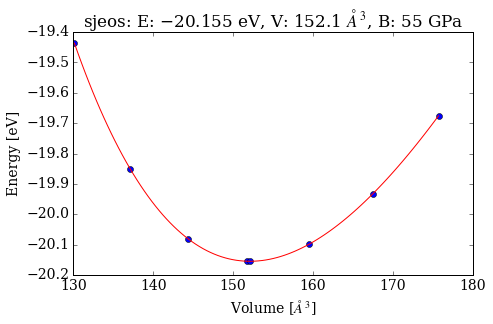

-- fit results are saved in  figs/Bi2Se3.su.static.100.png 



(["db['Bi2Se3.su.static.100']    |  -20.1544  |10.27;10.27;10.27|  -799,-800,-774    |   1,13, 13   "],
 [])

In [15]:
res('Bi2Se3.su', 'static', list(range(1,8))+[100], up = 'up', show = 'fit', analys_type = 'fit_a', check_job = 0)

### Change SET parameters

In [ ]:
read_vasp_sets([('ion_relax', 'static', {'ISIF':2, 'NSW':20, 'EDIFFG':-0.025}, 'override')]) #new set 'ion_relax' from 'static' with 'NSW' = 20
print('NSW = ', header.varset['ion_relax'].vasp_params['NSW'])

In [ ]:
add('Bi2Se3', 'ion_relax', 1, input_geo_file = 'Bi2Se3_mp-541837_computed.POSCAR', run = 1) # no need

### Calculate relaxation energy

In [ ]:
res('Bi2Se3', 'ion_relax', 1)
print('Relaxation energy = {:.6} meV'.format(1000*(db['Bi2Se3','ion_relax', 1].energy_sigma0 - db['Bi2Se3', 'static', 1].energy_sigma0)))

### Inherit optimized structure and relax atomic positions

In [12]:
Bi2Se3 = db['Bi2Se3.static.1'] # structure from database

Bi2Se3.run('ion_relax', run = 1)

#you can also use the command below, but it is deprecated
# add('Bi2Se3.su', 'ion_relax', 100, inherit_option = 'full', run = 0, override = 1)
# res('Bi2Se3.su.if', ['ion_relax'], [100], show = 'fo'  )

-- Attention!, cluster None is not found, using default default 

-- Directory ./Bi2Se3/Bi2Se3.ifn  was created 

-- File xyz/Bi2Se3.static.1.end.xyz was written 

-- inherit_ngkpt(): the k-grid from Bi2Se3 was inherited to Bi2Se3.ifn 

-- check_kpoints(): Kpoint   mesh is:  [8, 8, 8] 

-- check_kpoints(): The actual k-spacings are  [ 0.22  0.22  0.22] 

-- POSCAR was written to /hdd/home/aksenov/Simulation_wrapper/siman/tutorials/Bi2Se3//Bi2Se3.ifn.ion_relax/1.POSCAR 

-- Attention! ngkpt =  [8, 8, 8]  is adopted from struct_des which you provided for it  Bi2Se3.ifn  and kspacing =  0.235 


Calculation ('Bi2Se3.ifn', 'ion_relax', 1) successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
              3126       AMG Cu310A2C    emily  R 2-10:07:39      1 node-amg01
              3127       AMG Cu310A2C    emily  R 2-10:07:39      1 node-amg02
              3281       AMG tetracen n.tukach  R      19:08      1 node-amg05
              3145     

In [ ]:
#To read results run again
Bi2Se3.run('ion_relax')

In [ ]:
# you may need to recalculate your job, for this use
Bi2Se3.run('ion_relax', up = 'up2', add = 1)

In [ ]:
#several inherit options are available with iopt keyword: 
    #full - full inherit including magnetic moments 
    #full_nomag - inherit structure, but magnetic moments are initialized with default values for chosen set
    #full_chg - inherit charge file
    
    
Bi2Se3.run('ion_relax', iopt = 'full')   
#By default iopt = 'full_nomag'

### Inherit structure and create supercell 222

In [ ]:
add('Bi2Se3.su', 'static', 100, inherit_option = 'supercell', run = 0, mul_matrix = [[2,0,0],[0,2,0],[0,0,2]])

In [ ]:
#or step by step
Bi2Se3 = db['Bi2Se3.static.1']
mul_matrix = [[2,0,0],[0,2,0],[0,0,2]]
sc = create_supercell(Bi2Se3, mul_matrix)
add('Bi2Se3.sc', 'static', 1, input_st = sc, it_folder = 'Bi2Se3', run = 0)

### Write result in compact binary form -  write_database()
The function creates several files called calc.gdbm3 and only_calc.gdbm3 in the current folder.
On the next run the function read_database() will read them and you can access you results using res_loop() or calc dictionary

In [8]:
write_database()


Database has been successfully updated

